# **Attention Is All You Need**
---

## **Abstract**
#### **기존 모델의 한계**
- 기존 sequence 변환 model: encoder와 decoder를 포함하는 RNN이나 CNN 기반
- 최고 성능 model: attention 메커니즘을 통해 encoder와 decoder 연결
#### **새로운 방법론: transformer 제안**
- **transformer**: RNN과 CNN을 전혀 사용하지 않고, **오직 attention mechanism에만 기반**한 새로운 네트워크 아키텍처
- 장점: model이 병렬화가 더 용이해짐, 훈련 시간이 상당히 줄어듦
- 일반화 능력: 영어 구문 분석 작업에도 성공적으로 적용되어, 큰 데이터와 제한된 데이터 모두에서 잘 작동함.
##### **Q. 논문의 "a new simple network architecture" 의미**
= transformer는 기존의 복잡한 model들보다 **더 단순한 구조**이다.  
-> why? 복잡한 계산을 필요로 하는 RNN이나 CNN 계층을 제거하고, 상대적으로 계산이 단순한 어텐션 메커니즘을 활용함으로써 전체적인 네트워크 구조가 단순해짐.
- **순환 및 합성곱 연산 제거**: transformer는 RNN이나 CNN에서 사용하는 복잡한 순환(recurrence)과 합성곱(convolution) 연산을 전혀 사용하지 않음
- **오직 attention mechanism만 사용**: transformer는 오직 attention mechanism에만 의존하여 입력과 출력 사이의 관계를 모델링함. attention mechanism은 병렬 처리 가능함.
#### **실험 결과**
- 영어-독일어 번역: 28.4 BLEU 점수로 기존 최고 기록보다 2 BLEU 이상 향상
- 영어-프랑스어 번역: 41.8 BLEU 점수로 단일 모델 최고 기록
- 훈련 시간: 8개의 GPU로 3.5일 동안 훈련
##### **Q. BLEU(Bilingual Evaluation Understudy)**
- 기계 번역의 성능 측정 방법
- 기계 번역 결과와 사람이 직접 번역한 결과가 얼마나 유사한지 비교하여 번역에 대한 성능을 측정하는 방법
- BLEU가 높을수록 성능이 더 좋음을 의미함
- 측정 기준: n-gram 기반
- 장점: 언어에 구애받지 않고 사용 가능, 계산 속도 빠름

---

## **Introduction**
### **Recurrent model(RNN, LSTM, GRU)**
- 언어 모델링과 기계 번역과 같은 시퀀스 모델링 및 변환 문제에서 SOTA 방법으로 확립됨.
#### **특성: 순차적 계산**
- sequence의 각 symbol(단어)을 순차적으로 처리함.
- hidden state sequence: 각 시점 t에서 이전 시점 t-1의 hidden state와 현재 입력을 기반으로 새로운 hidden state 생성
#### **문제점: 병렬 처리의 한계**
- 순차적인 특성 때문에 긴 시퀀스를 처리할 때 병렬화가 어려우며, 이는 훈련 시간과 메모리 사용에 제약을 줌.
- 최근에는 인수분해 트릭과 조건부 계산을 통해 계산 효율성을 높이려는 노력이 있었으나, 순차적 계산의 근본적인 한계는 여전히 존재함.
### **attention mechanism**
- 다양한 작업에서 강력한 sequence 모델링과 변환의 필수 요소
- 기존 사용 방식: attention mechanism과 RNN의 결합으로 사용됨.  
  ex) RNN 기반의 encoder-decoder model에서 attention은 encoder와 decoder를 연결하는 역할
#### **의존성 모델링**
- **시퀀스 내의 요소들 사이의 의존성 모델링**: 시퀀스 길이에 상관없이 시퀀스 내의 각 요소 간의 관계(의존성)를 학습(모델링)할 수 있음.
- RNN의 제약
    - RNN은 sequence를 순차적으로 처리하기 때문에 sequence 내에서 먼 거리의 요소들 간의 관계를 학습하는 데 한계가 있음. 이는 긴 sequence를 처리할 때 두드러짐.
    - ex) 문장 "I love machine learning because it is fascinating"에서 첫 번째 단어 "I"와 마지막 단어 "fascinating" 간의 관계를 학습하려면 여러 단계의 순차적 처리가 필요함.
- attention mechanism의 장점
    - 시퀀스 내 모든 요소들 간의 관계를 한 번에 고려할 수 있음. 즉, 입력 시퀀스의 처음과 끝 부분에 있는 요소들 간의 관계도 직접적으로 모델링 가능.
    - ex) "I"와 "fascinating" 간의 관계를 한 번에 학습 가능 -> 이는 두 단어가 시퀀스 내에서 얼마나 떨어져 있는지에 상관없이 가능함.
### <span style="background-color:#fff5b1">**In Paper: Transformer**</span>
- 순환(recurrence) 없이 **attention mechanism만 사용**
- **입력 시퀀스와 출력 시퀀스 사이의 의존성 모델링**
    - 트랜스포머 모델이 입력 시퀀스와 출력 시퀀스 간의 전역적인 의존성을 모델링할 수 있음.
    - 입력 시퀀스의 특정 요소가 출력 시퀀스의 특정 요소에 어떻게 영향을 미치는지를 모델링
    - ex) 입력 시퀀스 "I love AI"가 주어졌을 때, 출력 시퀀스 "나는 인공지능을 사랑해"에서 "I"가 "나는"에, "love"가 "사랑해"에 어떻게 영향을 미치는지를 학습
- 더 많은 병렬 처리 가능
- 8개의 P100 GPU로 12시간 만에 SOTA 달성
---

## **Background**
#### **순차적 계산을 줄이는 것을 목표로 하는 모델**
- 확장 신경 GPU(Extended Neural GPU), ByteNet, ConvS2S
- CNN을 기본 구성 요소로 사용
- 모든 입력 및 출력 위치에 대해 은닉 표현을 병렬로 계산(=모델이 입력 시퀀스와 출력 시퀀스의 각 요소를 동시에 처리) -> 계산 효율성 높임
- 한계점: 입력 시퀀스 내 또는 출력 시퀀스 내의 요소(위치) 간의 신호를 연결하는 데 필요한 연산 수가 위치(position) 간의 거리에 따라 증가함. -> 먼 거리 위치 간의 의존성 학습 어려움.
#### **transformer**
sequence 정렬 RNN이나 convolution(합성곱)을 사용하지 않고 전적으로 self-attention에 의존하여 입력 및 출력의 표현을 계산하는 최초의 변환 모델
- 장점: 위치 간 신호를 연결하는 데 필요한 연산 수를 줄여 일정하게 유지 -> 계산 효율성 높임
- 단점: 어텐션 가중치를 평균화함 -> 유효 **해상도 감소 문제**(=각 위치의 정보를 세밀하게 반영하는 능력이 줄어들 수 있음)  
  **해상도(resolution)**: 모델이 입력 시퀀스의 각 위치에 대해 얼마나 세밀하게 정보를 표현할 수 있는지를 의미함.
- sol: 멀티-헤드 어텐션(Multi-Head Attention) 사용 -> 해상도 감소 문제 해결
##### **Q. Multi-Head Attention Mechanism이란?**
attention mechanism을 여러번 병렬로 실행하여 서로 다른 하위 공간에서 정보를 추출하고 결합하는 방법
- **다중 헤드**: 어텐션 메커니즘을 한 번만 적용하는 대신, 여러 개의 어텐션 메커니즘(헤드)을 병렬로 실행함. 각 헤드는 입력 데이터를 다른 가중치로 변환하여 서로 다른 하위 공간의 정보를 추출함.
- **병렬 처리**: 모든 헤드는 병렬로 처리되며, 각각의 어텐션 결과는 독립적으로 계산됨.
- **결합**: 각 헤드의 출력을 결합하여 최종 출력을 생성함. (단순히 각 헤드의 출력을 연결(concatenate)한 후, 다시 한 번 선형 변환을 통해 이루어짐)
#### <span style="background-color:#FFE6E6">**self-attention**</span>
시퀀스 내의 각 요소가 다른 모든 요소와의 관계를 고려하여 자신의 새로운 표현(벡터 표현, hidden state, hidden representation)을 계산하는 메커니즘
- ex) 간단 예시 과정
    1. 입력 시퀀스 "I love AI"의 각 단어는 고유한 embedding vector로 변환됨 ex) $x_1, x_2, x_3$
    2. 각 단어의 embedding vector는 쿼리, 키, 값 벡터로 변환 ex)$q_i, k_i, v_i$
    3. 어텐션 스코어 계산(by dot product) 및 소프트맥스 적용(스코어->확률 변환)
    4. 각 단어의 값 벡터에 어텐션 스코어를 곱하여 가중합 계산
    5. 새로운 벡터 표현 얻음

---

## **Model Architecture**
### **transformer architecture**
transformer의 encoder와 decoder는 여러 층으로 구성되며, 각 층은 **self-attention과 point-wise 완전 연결 계층(fully connected layer)** 으로 이루어짐.
##### **Q. 논문에서 "point-wise, fully connected layers"의 의미**
= 각 위치의 입력에 대해 독립적으로 작동하는 완전 연결 계층  
= 시퀀스의 각 요소(단어 또는 토큰)에 대해 개별적으로 완전 연결 계층이 적용된다는 뜻  
- **point-wise**
    - 시퀀스의 각 위치(단어 또는 토큰)를 독립적으로 처리하는 것
    - 각 위치에 대해 별도의 연산이 수행된다는 것 
- **fully connected layer**
    - 입력 벡터를 새로운 출력 벡터로 변환하는 신경망 계층으로, 모든 입력 노드가 모든 출력 노드에 연결되어 있어 각 입력 요소가 모든 출력 요소에 영향을 미침.
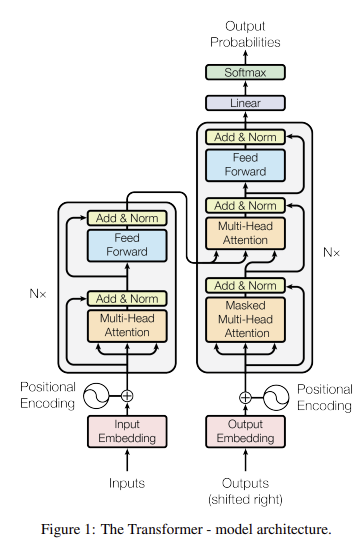  
[그림1] transformer 구조

### **1. Encoder and Decoder Stacks**
#### **background: Residual Connection(잔차 연결)**
- 신경망의 각 층에서 입력 데이터를 그대로 다음 층으로 전달하면서, 해당 층의 출력을 입력 데이터에 더하는 방법
- skip connection(스킵 연결)이라고도 함
- 수학적 표현: 입력 $x$와 층에서 계산된 출력 $F(x)$가 있을 때, 잔차 연결은 $x+F(x)$ 형태로 출력을 계산함.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbLujPF%2Fbtsk1au4T3D%2FaOzJxo1KAhj6fk5b99PYYK%2Fimg.png" width="300" height="300"/>

##### **Q. 잔차 연결을 사용하는 이유**
신경망이 깊어질 때 발생하는 문제를 해결하고, 학습의 난이도를 완화하기 위함.
- **vanishing gradient problem 해결**: 깊은 신경망에서 역전파 중 기울기가 소실되는 문제를 완화
- **degradation problem 해결**: 신경망이 깊어질수록 성능이 저하되는 문제를 방지
- **효율적인 학습**: 입력을 다음 층으로 직접 전달하여 학습해야 할 변화를 줄임으로써 학습을 더 안정적이고 효과적으로 만듦

아래 그림으로 transformer에서의 잔차 연결을 직관적으로 이해해보자.  
- transformer에서의 잔차 연결: sub-layer의 input과 output을 더하는 것
- $Sublayer$: 그림1에서 **Multi-Head Attention**(주황색)과 **Feed Forward Network**(파란색)
- $LayerNorm$: 그림 1에서 **Add & Norm**(노란색)에 해당하며, 이는 Residual Connection과 Layer Normalization을 포함함. 즉, sub-layer의 입력 $x$에 sub-layer의 출력 $Sublayer(x)$를 더한 후, Layer Normalization을 적용함.  
- $LayerNorm(x + Sublayer(x)$: 각 서브 레이어의 출력

![잔차 연결](https://velog.velcdn.com/images/glad415/post/633f5a29-ea3a-4228-a748-36dd75b8eecb/image.png)  
[그림2] 입력 $x$와 함수 $F(x)$의 값을 더한 함수 $H(x)$의 구조

#### **encoder**
- 6개의 동일한 층(N=6)으로 구성됨
- 각 층은 2개의 sub-layer를 포함함
    - 1st sub-layer: multi-head self-attention mechanism
    - 2nd sub-layer: position-wise fully connected feed-forward network(위치별 완전 연결 피드포워드 네트워크)
    - 각 sub-layer 주위에는 잔차 연결(residual connection)과 층 정규화(layer normalization)가 적용됨 -> 그림1에서 **Add & Norm**(노란색)에 해당
    - 모든 sub-layer와 embedding layer는 $d_{model}=512$ 차원 벡터를 출력함
#### **decoder**
- 6개의 동일한 층(N=6)으로 구성됨
- 각 층은 encoder의 2개의 sub-layer + **encoder stack의 output에 대해 multi-head attention을 수행하는 3rd sub-layer**를 포함함.
    - 3rd sub-layer: (그림 1에서 Masked Multi-Head Attention에 해당) 이후 위치를 참조하지 않도록 마스킹됨. -> why? 위치 i에 대한 예측이 i보다 작은 위치에서의 알려진 출력에만 의존하도록 보장하기 위함.

### **2. Attention**
#### **attention function**
쿼리와 키-값 쌍을 입력으로 받아, 쿼리와 키 간의 유사도에 따라 값들의 가중합을 출력으로 계산하는 메커니즘
- **정의**: 쿼리(query)와 키(key)-값(value) 쌍을 출력으로 매핑하는 함수
- 쿼리, 키, 값, 출력은 모두 벡터임
- **출력 계산**: 값(value)들의 가중합
- 각 값에 할당된 **가중치 계산**: 쿼리와 해당 키 간의 유사도 함수로 계산
#### **Scaled Dot-Product Attention**  
쿼리와 키의 내적을 계산한 후, 이를 키의 차원 수의 제곱근으로 나누고 소프트맥스 함수를 적용하여 가중치를 구한 뒤, 이를 값 벡터에 곱해 최종 출력을 생성하는 방법

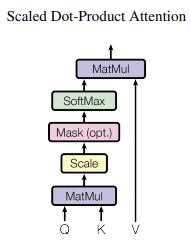

<span style="background-color:#fff5b1">**Scaled Dot-Product Attention**</span>
- **입력**: 차원이 $d_k$인 쿼리와 키, 차원이 $d_v$인 값
- **계산**
    - 1. 쿼리와 모든 키의 dot-product(내적) 계산(MatMul)
    - 2. 각 결과를 $\sqrt{d_k}$로 나눔(Scale)
    - 3. softmax 적용하여 가중치 생성
- **출력**: 값(value)의 가중합(Matmul)

**행렬 연산**- 실제로 우리는 쿼리 집합에 대해 동시에 attention function을 계산함
- 쿼리, 키, 값을 각각 $Q, K, V$ 행렬에 모아둠
- **행렬 연산으로 attention function 계산**:  
  $Attention(Q,K,V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$

**흔히 사용되는 attention function: additive attention & dot-prodcut(multiplicative) attention**
- 가산 어텐션: 단일 hidden layer가 있는 feed-forward network를 사용하여 유사도 함수 계산
- 닷 프로덕트 어텐션: 스케일링 요소 $\frac{1}{\sqrt{d_k}}$를 제외한 것. 더 빠르고 공간 효율적임.
##### **Q. 스케일링을 왜 하는가?(스케일링의 필요성)**
- 큰 $d_k$값에서는 닷 프로덕트가 크게 증가하여 softmax 함수가 작은 기울기 영역으로 밀려남
- 이를 방지하기 위해 닷 프로덕트를 $\frac{1}{\sqrt{d_k}}$로 스케일링함.

#### <span style="background-color:#fff5b1">**Multi-Head Attention**</span>  
입력을 여러 번 선형 변환한 후 병렬로 어텐션(*Scaled Dot-Product Attention*)을 수행하고, 그 결과를 결합하여 최종 출력을 생성하는 과정  
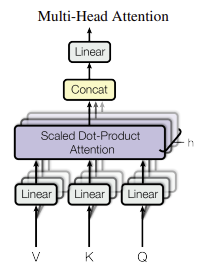

**Multi-Head Attention 계산**
- 1. **선형 투영**
    - 입력 쿼리(Q), 키(K), 값(V)를 각각 다른 가중치 행렬 $W_i^Q, W_i^K, W_i^V$로 선형 변환하여 h개의 독립적인 쿼리, 키, 값 세트를 생성
- 2. **Scaled Dot-Product Attention**: 
    - 각 투영된 쿼리, 키, 값 세트에 대해 스케일드 닷 프로덕트 어텐션을 병렬로 수행하여 h개의 $d_v$차원 출력 값을 얻음.
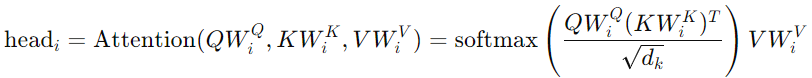
- 3. **출력 병합**
    - h개의 attention 출력을 연결(concat)하여 하나의 긴 vector로 만듦
- 4. **최종 선형 투영**
    - 병합된 vector를 최종 선형 투영 행렬 $W^O$로 변환하여 최종 출력을 생성함
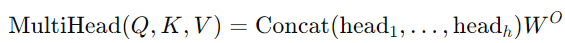

**장점**
- 다른 위치에서 다양한 표현 하위 공간의 정보를 동시에 처리함.  
  -> 단일 어텐션 헤드가 평균화로 인해 다양한 표현 하위 공간의 정보를 동시에 처리하지 못하는 한계를 해결함.

#### **Applications of Attention in our Model**
transformer는 세 가지 방식으로 multi-head attention을 사용함.  
**1. encoder-decoder attention layer**
- 쿼리: 이전 decoder layer에서 옴
- 키, 값: encoder의 출력에서 옴
- 이는 decoder의 모든 위치가 입력 sequence의 모든 위치에 참석(attend)할 수 있게 함

**2. encoder의 self-attention layer**
- 모든 키, 값, 쿼리가 동일한 위치에서 오며, encoder의 이전 레이어의 출력에서 옴
- encoder의 각 위치는 encoder의 이전 레이어의 모든 위치에 참석할 수 있음

**3. decoder의 self-attention layer**
- 디코더의 각 위치는 그 위치까지 포함하여 디코더의 모든 위치에 참석할 수 있음
- 자기회귀(auto-regressive) 속성을 유지하기 위해 불법 연결을 마스킹하여 정보 흐름을 제어함)

---

## **Conclusion**
#### **transformer**
- 완전히 어텐션에 기반한 최초의 시퀀스 변환 모델
- encoder-decoder 아키텍처에서 순환 layer를 Multi-Head Attention으로 대체
#### **번역 작업 성능**
- transformer는 순환 또는 합성곱 레이어 기반 아키텍처보다 훨씬 빠르게 학습함
- WMT 2014 영어-독일어 및 영어-프랑스어 번역 작업에서 새로운 최고 성능 달성
- 영어-독일어 작업에서 이전의 모든 앙상블을 능가함
#### **미래 계획**
- 어텐션 기반 모델을 다른 작업에 적용
- transformer model을 text data 뿐만 아니라 다른 유형의 data에도 적용
- 로컬, 제한된 어텐션 메커니즘을 조사하여 transformer model이 텍스트 외의 다양한 데이터 유형을 효율적으로 처리할 수 있도록 확장
- 생성 과정을 덜 순차적으로 만드는 연구 목표